In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('FyntraCustomerData.csv')

In [3]:
data.shape

(500, 8)

In [4]:
data.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### 1. Compute -- Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Is there a correlation? 

AttributeError: 'Rectangle' object has no property 'normed'

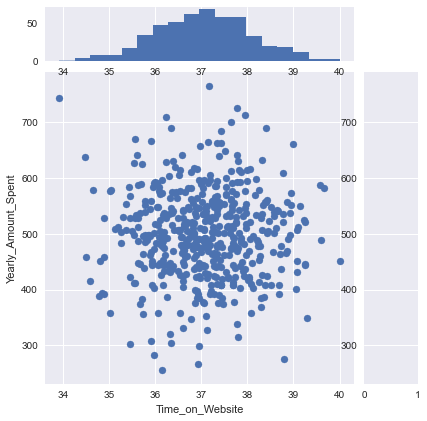

In [5]:
sns.jointplot(x=data['Time_on_Website'],y=data['Yearly_Amount_Spent'])
plt.show()

In [8]:
data[['Time_on_Website','Yearly_Amount_Spent']].corr()

,Time_on_Website,Yearly_Amount_Spent
Time_on_Website,1.000000,-0.002641
Yearly_Amount_Spent,-0.002641,1.000000


In [9]:
# There is no significant correlation between the attributes 'Time on website' an'Yearly amount spent'

### 2. Compute – Do the same as above but now with Time on App and Yearly Amount Spent. Is this correlation stronger than 1st One? 

AttributeError: 'Rectangle' object has no property 'normed'

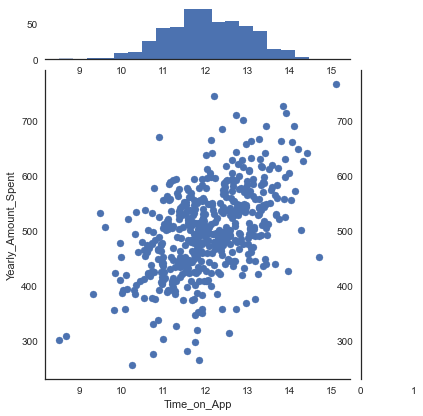

In [10]:
sns.jointplot(x=data['Time_on_App'],y=data['Yearly_Amount_Spent'])
plt.show()

In [11]:
data[['Time_on_App','Yearly_Amount_Spent']].corr()

,Time_on_App,Yearly_Amount_Spent
Time_on_App,1.000000,0.499328
Yearly_Amount_Spent,0.499328,1.000000


In [12]:
# This correlation is better compared to the previous one.

### 3. Compute -- Explore types of relationships across the entire data set using pairplot . Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?

<AxesSubplot:>

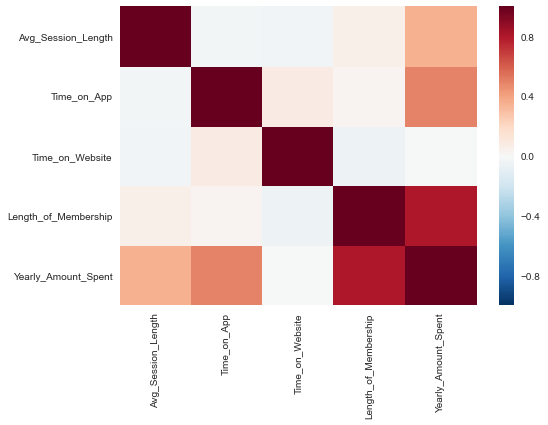

In [13]:
sns.heatmap(data.corr())

In [14]:
# Length of Membership seems to be most correlated with Yearly amount spent.

### 4. Compute – Create linear model plot of Length of Membership and Yearly Amount Spent. Does the data fits well in linear plot?

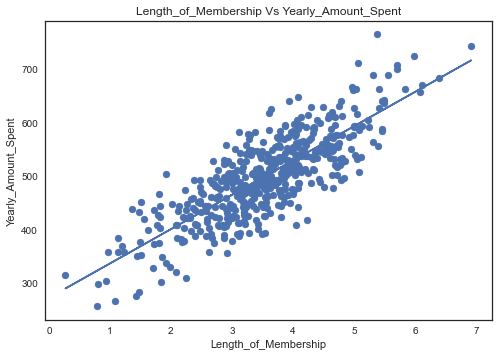

In [18]:
x = data['Length_of_Membership']
y = data['Yearly_Amount_Spent']

m, c = np.polyfit(x, y, 1)

plt.plot(x,m*x+c)
plt.scatter(x,y)
plt.xlabel('Length_of_Membership')
plt.ylabel('Yearly_Amount_Spent')
plt.title('Length_of_Membership Vs Yearly_Amount_Spent')
plt.show()

In [19]:
# The data fits well with linear plot

### 5. Compute – Train and Test the data and answer multiple questions -- What is the use of random_state=85? 

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [26]:
x = data[['Avg_Session_Length', 'Time_on_App',
       'Time_on_Website', 'Length_of_Membership']]

y = data['Yearly_Amount_Spent']

train_x, test_x, train_y, test_y = train_test_split(
    x, y, random_state=85, test_size=0.3)

In [27]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(350, 4)
(350,)
(150, 4)
(150,)


### 6. Compute – Predict the data and do a scatter plot. Check if actual and predicted data match?

In [30]:
lin_model = LinearRegression()
lin_model.fit(train_x, train_y)

LinearRegression()

In [31]:
predicted = lin_model.predict(test_x)

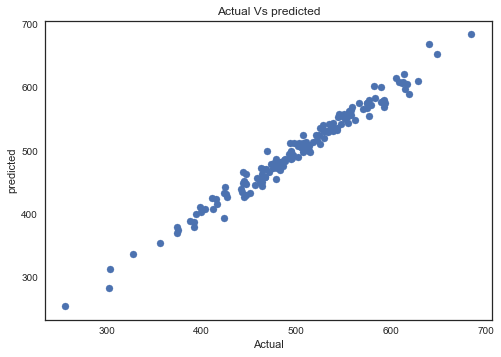

In [34]:
plt.scatter(x=test_y, y= predicted)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual Vs predicted')
plt.show()

### 7. What is the value of Root Mean Squared Error? 

In [38]:
rmse = np.sqrt(mean_squared_error(test_y,predicted))
rmse

10.572658672879317